In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression, make_classification, fetch_openml
import sklearn
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [19]:
x, y = make_classification(n_samples=1000, 
                            n_features = 4, 
                            random_state=0,
                            shuffle = False)


x[:2]
y[:2]

array([0, 0])

In [16]:
clf = RandomForestClassifier(max_depth= 20)
clf.fit(x, y, sample_weight=None)

RandomForestClassifier(max_depth=20)

In [43]:
clf.feature_importances_

array([0.05611571, 0.47353538, 0.10973683, 0.36061207])

In [17]:
print(clf.predict([[0,0,0,0]]))

[1]


Ensemble methods

In [24]:
# load data  
elec_data = fetch_openml(name = 'electricity', version = 1)


In [25]:
type(elec_data)

sklearn.utils.Bunch

In [28]:
elec_data.data.shape

(45312, 8)

In [30]:
type(elec_data.data)

pandas.core.frame.DataFrame

In [31]:
elec_data.target

0          UP
1          UP
2          UP
3          UP
4        DOWN
         ... 
45307    DOWN
45308    DOWN
45309    DOWN
45310      UP
45311    DOWN
Name: class, Length: 45312, dtype: category
Categories (2, object): ['UP', 'DOWN']

In [35]:
elec_data.feature_names

['date',
 'day',
 'period',
 'nswprice',
 'nswdemand',
 'vicprice',
 'vicdemand',
 'transfer']

In [36]:
elec_data.target_names

['class']

In [38]:
elec_df = elec_data.frame
type(elec_df) 

pandas.core.frame.DataFrame

Exploratory data analysis

In [39]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(elec_df, test_size = 0.2, random_state = 20)

print('The size of training data is {}\nThe size of testing data is {}\n'.format(len(train_data), len(test_data)))

The size of training data is 36249
The size of testing data is 9063



In [40]:
train_data.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
34913,0.875979,1,0.361702,0.029182,0.345135,0.001894,0.230192,0.653070,DOWN
32750,0.876598,5,0.297872,0.028552,0.483041,0.001834,0.559555,0.602193,DOWN
18448,0.443255,1,0.340426,0.040771,0.332490,0.002503,0.163905,0.765789,DOWN
10779,0.031415,2,0.574468,0.083073,0.515918,0.003467,0.422915,0.414912,DOWN
17423,0.442326,7,1.000000,0.054221,0.315234,0.003467,0.422915,0.414912,UP


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36249 entries, 34913 to 27098
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       36249 non-null  float64 
 1   day        36249 non-null  category
 2   period     36249 non-null  float64 
 3   nswprice   36249 non-null  float64 
 4   nswdemand  36249 non-null  float64 
 5   vicprice   36249 non-null  float64 
 6   vicdemand  36249 non-null  float64 
 7   transfer   36249 non-null  float64 
 8   class      36249 non-null  category
dtypes: category(2), float64(7)
memory usage: 2.3 MB


In [45]:
train_data.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000
mean,0.498381,0.499081,0.057946,0.424772,0.003439,0.422941,0.500243
std,0.340305,0.294767,0.040363,0.163492,0.008588,0.120885,0.153296
min,0.000000,0.000000,0.000000,0.001190,0.000000,0.000000,0.000000
25%,0.031901,0.234043,0.035217,0.308242,0.002283,0.371828,0.414912
50%,0.456307,0.489362,0.048607,0.442874,0.003467,0.422915,0.414912
75%,0.880581,0.744681,0.074336,0.535406,0.003467,0.469187,0.605702
max,1.000000,1.000000,0.981806,1.000000,1.000000,1.000000,1.000000


In [46]:
train_data[['date', 'period', 'vicprice']].describe()

,date,period,vicprice
count,36249.000000,36249.000000,36249.000000
mean,0.498381,0.499081,0.003439
std,0.340305,0.294767,0.008588
min,0.000000,0.000000,0.000000
25%,0.031901,0.234043,0.002283
50%,0.456307,0.489362,0.003467
75%,0.880581,0.744681,0.003467
max,1.000000,1.000000,1.000000


In [48]:
train_data[train_data.notna()]

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
34913,0.875979,1,0.361702,0.029182,0.345135,0.001894,0.230192,0.653070,DOWN
32750,0.876598,5,0.297872,0.028552,0.483041,0.001834,0.559555,0.602193,DOWN
18448,0.443255,1,0.340426,0.040771,0.332490,0.002503,0.163905,0.765789,DOWN
10779,0.031415,2,0.574468,0.083073,0.515918,0.003467,0.422915,0.414912,DOWN
17423,0.442326,7,1.000000,0.054221,0.315234,0.003467,0.422915,0.414912,UP
...,...,...,...,...,...,...,...,...,...
31962,0.875846,2,0.893617,0.028822,0.427998,0.001288,0.385293,0.813158,DOWN
23452,0.460112,7,0.595745,0.026660,0.369979,0.001774,0.234076,0.621053,DOWN
23775,0.460422,7,0.319149,0.026750,0.373550,0.001813,0.269032,0.564035,DOWN
37135,0.889828,5,0.659574,0.028462,0.555638,0.002021,0.625583,0.248684,DOWN


In [50]:
train_data.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [55]:
corr= train_data.corr()
corr

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
date,1.000000,0.002310,-0.147059,0.070834,0.005072,0.055003,0.404228
period,0.002310,1.000000,0.104229,0.446995,0.027197,0.196648,-0.119464
nswprice,-0.147059,0.104229,1.000000,0.303600,0.307889,0.300885,-0.269291
nswdemand,0.070834,0.446995,0.303600,1.000000,0.097075,0.670954,-0.268718
vicprice,0.005072,0.027197,0.307889,0.097075,1.000000,0.141827,-0.096216
vicdemand,0.055003,0.196648,0.300885,0.670954,0.141827,1.000000,-0.555760
transfer,0.404228,-0.119464,-0.269291,-0.268718,-0.096216,-0.555760,1.000000


<AxesSubplot:>

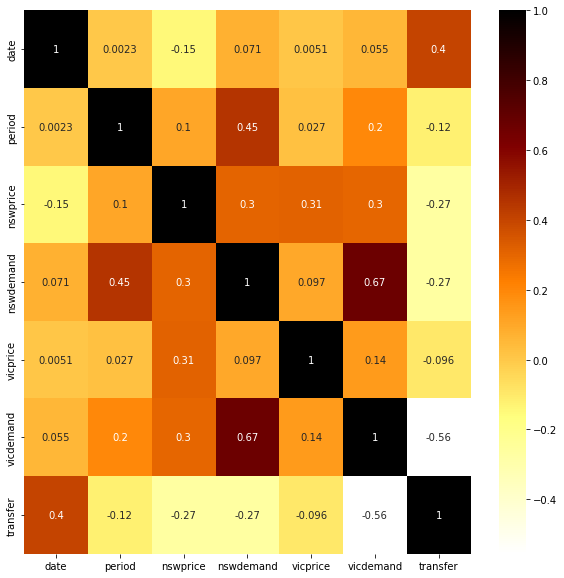

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap = 'afmhot_r')

<AxesSubplot:xlabel='class', ylabel='count'>

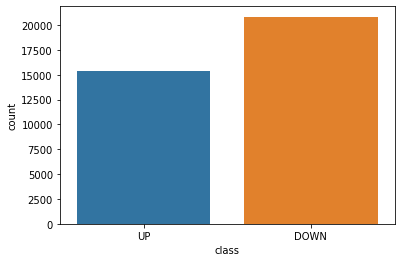

In [62]:
sns.countplot(x='class',  data=train_data, hue =)

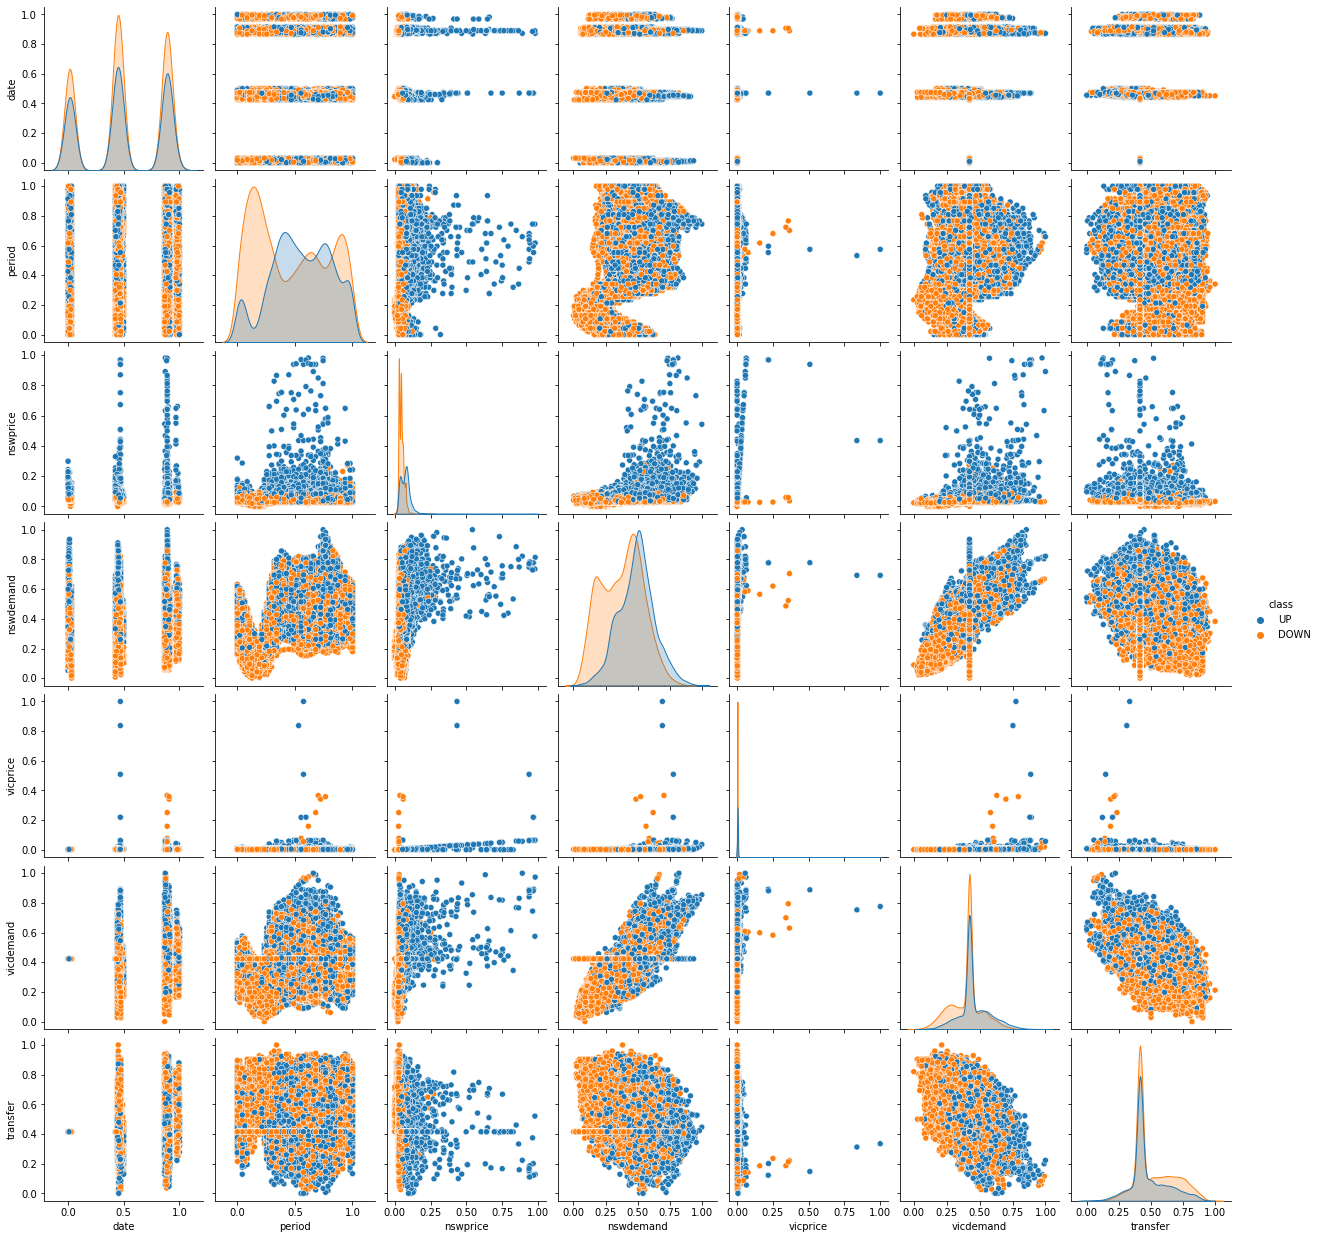

In [63]:
# sns.pairplot(train_data, hue='class')

<AxesSubplot:xlabel='day', ylabel='count'>

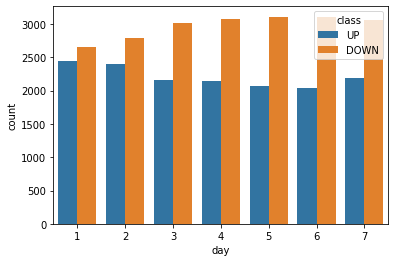

In [65]:
sns.countplot(data = train_data, x ='day', hue='class')

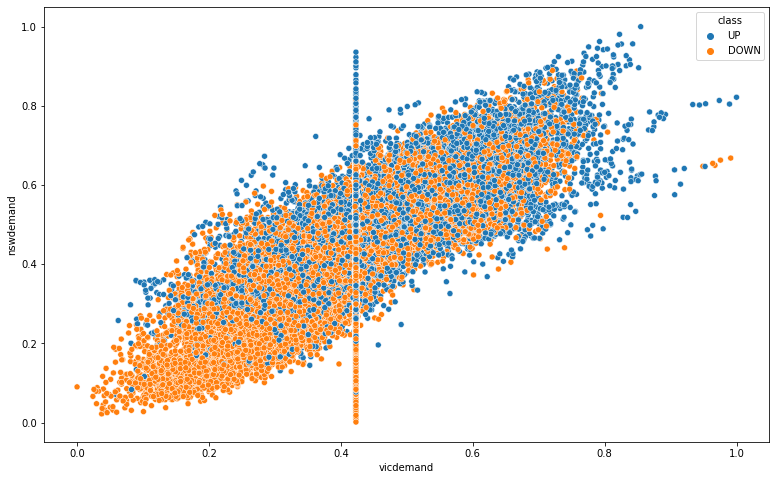

In [68]:
plt.figure(figsize=(13,8))
sns.scatterplot(data=train_data, x='vicdemand', y='nswdemand', hue='class')

plt.savefig('demands.png', dpi=300, format='png')

<AxesSubplot:xlabel='vicdemand', ylabel='nswdemand'>

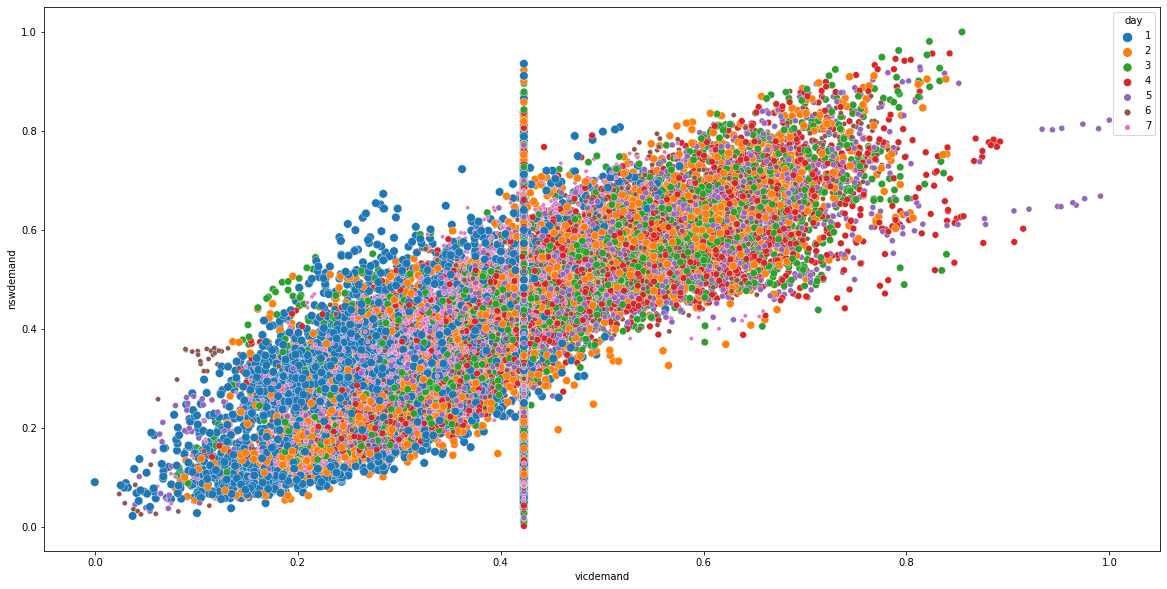

In [69]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train_data, x='vicdemand', y='nswdemand', hue='day', size='day')

<AxesSubplot:xlabel='day', ylabel='vicdemand'>

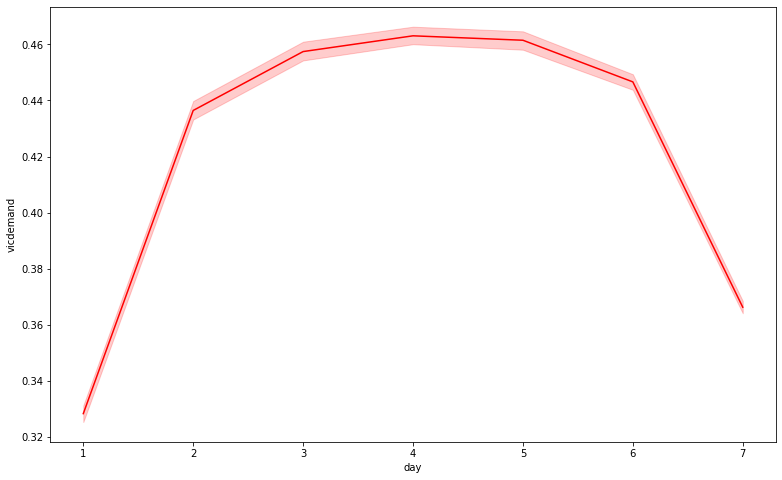

In [70]:
plt.figure(figsize=(13,8))
sns.lineplot(data=train_data, x='day', y='vicdemand', color='red')

<AxesSubplot:xlabel='date', ylabel='nswdemand'>

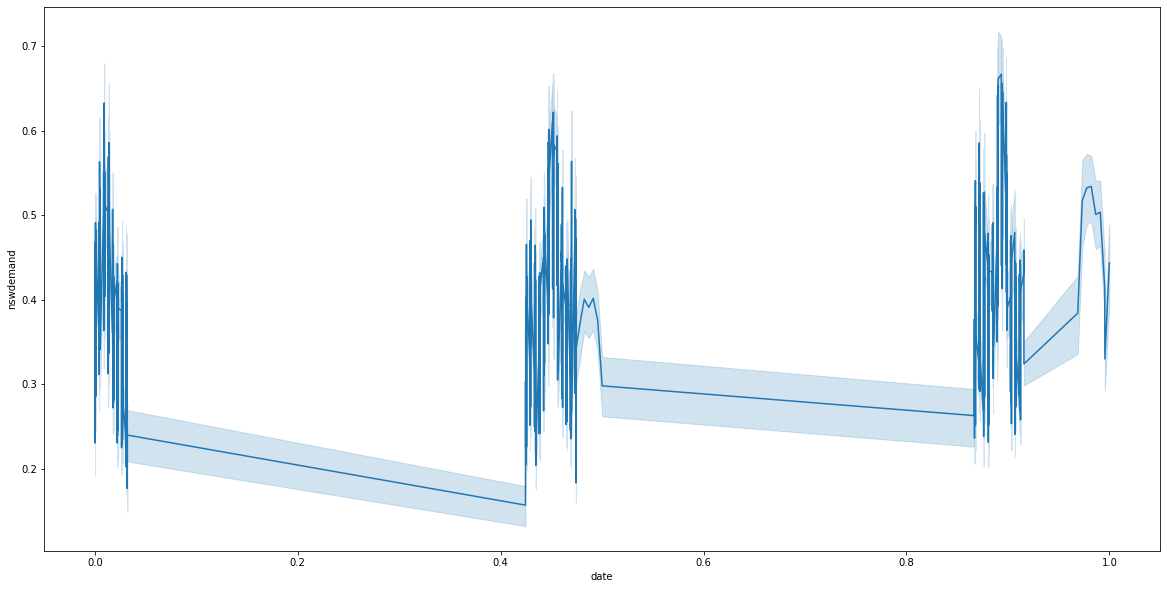

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(data = train_data, x = 'date', y = 'nswdemand')

<AxesSubplot:xlabel='date', ylabel='vicdemand'>

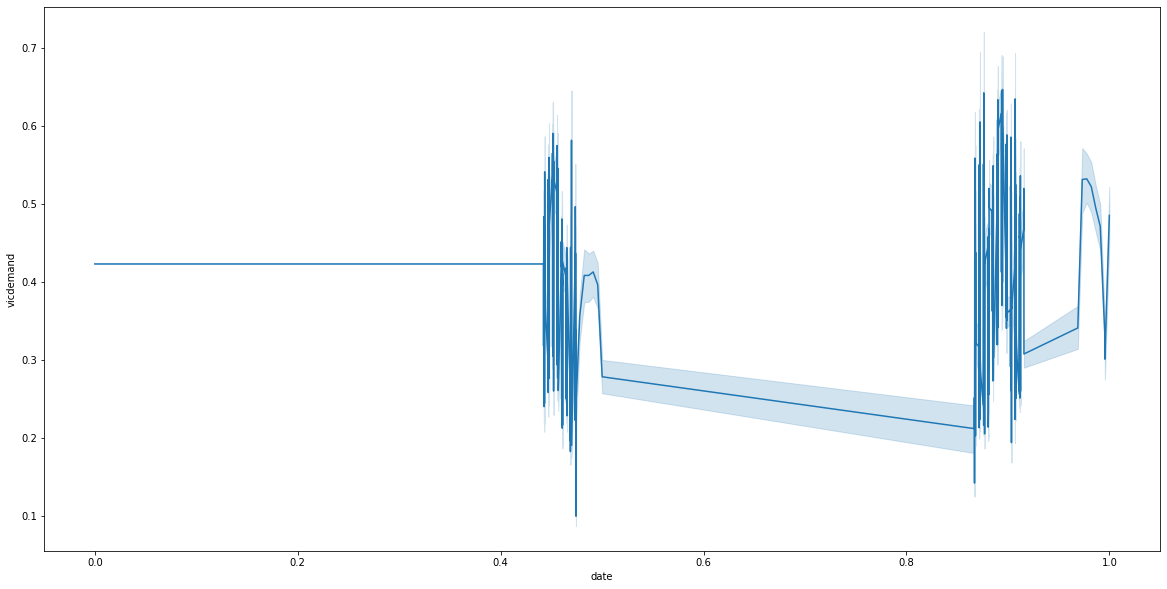

In [73]:
plt.figure(figsize=(20,10))
sns.lineplot(data=train_data, x='date', y='vicdemand')

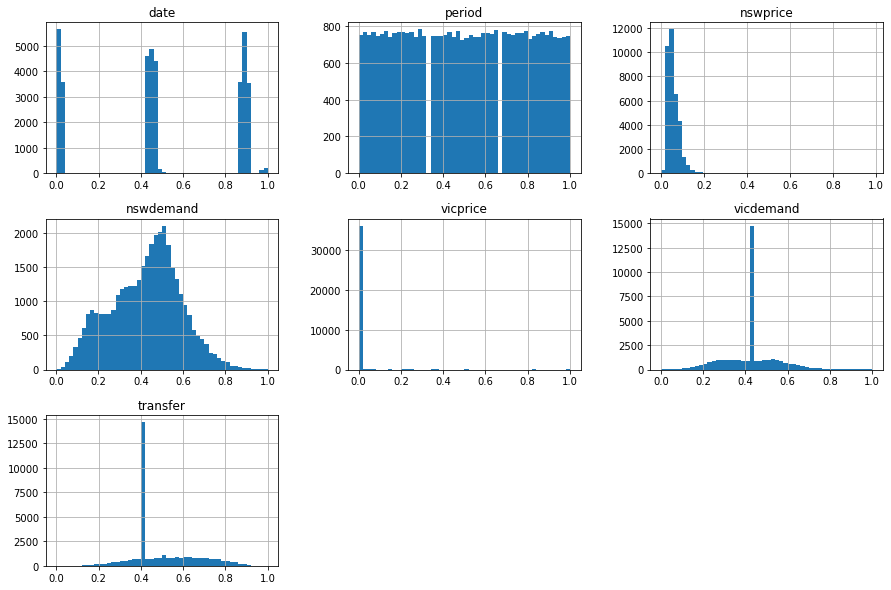

In [74]:
train_data.hist(bins = 50, figsize =(15, 10))
plt.show()

Data preprocessing

In [78]:
x_train = train_data.drop('class', axis =1)
y_train = train_data['class']

In [79]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train_prepared = label_enc.fit_transform(y_train)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


In [85]:
log_classifier = LogisticRegression()
sv_classifier = SVC()
sgd_classifier = SGDClassifier()

In [92]:
def classifiers(clf1, clf2, clf3, x_train, y_train):
    clfs = [clf1, clf2, clf3]

    all_clfs_acc = []

    for clf in clfs:
        clf.fit(x_train, y_train)
        preds = clf.predict(x_train)
        acc = accuracy_score(y_train, preds)
        acc = acc.tolist()
        all_clfs_acc.append(acc)

    return all_clfs_acc


In [93]:
classifiers(log_classifier, sv_classifier, sgd_classifier, x_train, y_train)

C:\Users\Okoro Chima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Okoro Chima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\Okoro Chima\AppData\Local\Programs\Python\Python310\lib\site-

[0.7518276366244586, 0.7389169356396038, 0.7562415514910756]

In [97]:
from sklearn.ensemble import VotingClassifier

vot_classifier = VotingClassifier(
    
    estimators=[('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)], 
    voting='hard')

vot_classifier.fit(x_train, y_train_prepared)

C:\Users\Okoro Chima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('log_reg', LogisticRegression()), ('svc', SVC()),
                             ('sgd', SGDClassifier())])

In [113]:
from sklearn.metrics import accuracy_score

def accuracy(model, data, labels):
    predictions = model.predict(data)
    acc = accuracy_score(labels ,predictions)

    return acc

In [111]:
accuracy(vot_classifier, x_train, y_train_prepared)

C:\Users\Okoro Chima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\Okoro Chima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0.7523517890148693

In [114]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [115]:
bag_classifier = BaggingClassifier( 
    DecisionTreeClassifier(class_weight ='balanced'), 
    max_samples=0.5, max_features=0.5, bootstrap=False
)

bag_classifier.fit(x_train, y_train_prepared)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  bootstrap=False, max_features=0.5, max_samples=0.5)

In [112]:
accuracy(bag_classifier, x_train, y_train_prepared)

0.9807167094264669

In [116]:
bag_classifier.base_estimator_

DecisionTreeClassifier(class_weight='balanced')

In [120]:
x_test = test_data.drop('class', axis =1)
y_test = test_data['class']


label_enc = LabelEncoder()
y_test_prepared = label_enc.fit_transform(y_test)

In [121]:
accuracy(bag_classifier, x_test, y_test_prepared)

0.9111773143550701

In [128]:
# preds = bag_classifier.predict(x_test)
# pd.DataFrame(preds)

In [133]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

grad_boost_clf = GradientBoostingClassifier(
                        n_estimators =500, 
                        learning_rate = 0.8, 
                        random_state = 42, 
                        max_depth=2
)

grad_boost_clf.fit(x_train, y_train_prepared)



GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=42)

In [134]:
accuracy(grad_boost_clf, x_train, y_train_prepared)

0.9291014924549643

In [136]:
# using the test data
accuracy(grad_boost_clf, x_test, y_test_prepared)


0.8989297142226635

Ada Boosting

In [137]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [144]:
adaboost_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth =3, class_weight ='balanced'), 
    n_estimators =300,
    learning_rate = 0.5
)

adaboost_clf.fit(x_train, y_train_prepared)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300)

In [145]:
accuracy(adaboost_clf, x_train, y_train_prepared)

0.9350051035890645

In [146]:
accuracy(adaboost_clf, x_test, y_test_prepared)

0.8992607304424584

XGBOOST

In [150]:
import xgboost as xgb 

# xgbclf = xgb.XGBClassifier(enable_categorical=True)
# xgbclf.fit(x_train,y_train_prepared)

In [153]:
# x_train.astype('category')